In [142]:
import pandas as pd
import numpy as np

In [143]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [144]:
students_performance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [145]:
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [146]:
students_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [147]:
students_performance.shape

(1000, 8)

In [148]:
students_performance.size

8000

In [149]:
students_performance.index

RangeIndex(start=0, stop=1000, step=1)

In [150]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [151]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [152]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [153]:
# # Урок 1.6 Группировка и агрегация, ничего, скоро привыкнем
students_performance.loc[students_performance.gender =='female']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [154]:
students_performance.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [155]:
students_performance.groupby('gender').aggregate({'math score' : 'mean', 'reading score' : 'mean'})

,math score,reading score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


In [156]:
students_performance.groupby('gender', as_index=False)\
    .aggregate({'math score' : 'mean', 'reading score' : 'mean'})\
    .rename(columns={'math score' : 'mean math score', 'reading score' : 'mean reading score'})

,gender,mean math score,mean reading score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [157]:
students_performance.groupby(['gender', 'race/ethnicity'], as_index=False)\
    .aggregate({'math score' : 'mean', 'reading score' : 'mean'})\
    .rename(columns={'math score' : 'mean math score', 'reading score' : 'mean reading score'})

,gender,race/ethnicity,mean math score,mean reading score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [158]:
students_performance.groupby(['gender', 'race/ethnicity'])\
    .aggregate({'math score' : 'mean', 'reading score' : 'mean'})\
    .rename(columns={'math score' : 'mean math score', 'reading score' : 'mean reading score'})

mean math score  mean reading score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [159]:
mean_score = students_performance.groupby(['gender', 'race/ethnicity'])\
    .aggregate({'math score' : 'mean', 'reading score' : 'mean'})\
    .rename(columns={'math score' : 'mean math score', 'reading score' : 'mean reading score'})

In [160]:
mean_score.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [161]:
mean_score.loc[('female', 'group A')]

mean math score       58.527778
mean reading score    69.000000
Name: (female, group A), dtype: float64

In [162]:
mean_score.loc[[('female', 'group A'),('female', 'group B')]]

mean math score  mean reading score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923

In [163]:
students_performance.sort_values(['gender', 'math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23
17,female,group B,some high school,free/reduced,none,18,32,28
787,female,group B,some college,standard,none,19,38,32
145,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
306,male,group E,some college,standard,completed,99,87,81
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99


In [164]:
students_performance.sort_values(['gender', 'math score'], ascending=False)\
    .groupby('gender').head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [165]:
students_performance = students_performance\
    .rename(columns=
            {'parental level of education' : 'parental_level_of_education',
             'test preparation course' : 'test_preparation_course',
             'math score' : 'math_score',
             'reading score' : 'reading_score',
             'writing score' : 'writing_score'
             })

In [166]:
students_performance.groupby('gender').math_score.nunique()

gender
female    79
male      68
Name: math_score, dtype: int64

In [167]:
students_performance['total_score'] = students_performance.math_score + \
    students_performance.reading_score + students_performance.writing_score

In [168]:
students_performance = students_performance.assign(total_log_score = \
                                                       np.log(students_performance.total_score))

In [169]:
students_performance.drop(['total_score'], axis=1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_log_score
0,female,group B,bachelor's degree,standard,none,72,72,74,5.384495
1,female,group C,some college,standard,completed,69,90,88,5.509388
2,female,group B,master's degree,standard,none,90,95,93,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.997212
4,male,group C,some college,standard,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,5.273000
998,female,group D,some college,standard,completed,68,78,77,5.407172


In [170]:
# Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их
# ног (колонка legs), и заполните их число в задании ниже.
# Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по Dota2.
df1 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df1
legs_0 = df1.groupby('legs').nunique()
legs_0

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,2,11,11,11,3,11
2,95,2,95,95,95,3,81
4,7,2,7,7,7,3,7
6,3,2,3,3,3,3,3
8,1,1,1,1,1,1,1


In [171]:
# К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите
# у кого из них больше средний заработок в различных категориях (колонка Type) и заполните
# таблицу, указывая исполнителя с большим заработком в каждой из категорий.
df2 = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv')
result = df2.groupby(['Executor', 'Type']).aggregate({'Salary': 'mean'})
result

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [172]:
# Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr
# и выберите самый распространённый набор характеристик.
df3 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df3
result_3 = df3.groupby(['attack_type', 'primary_attr'])
result_3.nunique()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19     4              19    19     19
            int                    2   2     1               2     2      2
            str                   35  35     4              35    35     31
Ranged      agi                   18  18     3              18    18     16
            int                   40  40     4              40    40     33
            str                    3   3     2               3     3      3

In [173]:
# Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он
# записал вид каждой водоросли, её род (группа, объединяющая близкие виды),
# группа (ещё одно объединение водорослей в крупные фракции) и концентрации
# анализируемых веществ.
# Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов
# (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной
# concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

concentrations = pd.read_csv('algae.csv')
mean_concentrations = concentrations.groupby('genus').aggregate({'sucrose' : 'mean',
                                                 'alanin' : 'mean',
                                                 'citrate' : 'mean',
                                                 'glucose' : 'mean',
                                                 'oleic_acid' : 'mean'
                                                 })
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [174]:
# Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны
# минимальная, средняя и максимальная концентрации аланина (alanin) среди видов
# рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.
np.around(concentrations.query("genus == 'Fucus'").alanin.describe()\
          .loc[['min', 'mean', 'max']].values, decimals=2)

array([0.35, 3.57, 6.64])

In [175]:
# Сгруппируйте данные по переменной group и соотнесите вопросы с ответами

In [176]:
concentrations.describe()

,sucrose,alanin,citrate,glucose,oleic_acid
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.098895,3.379068,4.603042,3.346347,3.054593
std,2.271190,2.400529,2.084948,1.094572,1.739319
min,0.704580,0.346431,1.071920,2.272724,0.304573
25%,2.589835,1.353551,3.563185,2.596385,2.292285
50%,3.569170,3.319066,5.413716,3.292899,2.678951
75%,6.476373,5.272747,5.786515,3.571159,3.965826
max,6.825467,6.881024,6.940588,6.013219,6.405165


In [177]:
concentrations.groupby('group').var()

,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,
brown,5.459098,7.220351,5.468942,1.767756,4.385233
green,2.672626,7.059917,3.950113,0.266265,0.540388
red,NaN,NaN,NaN,NaN,NaN


In [178]:
# Тема 1.7. Визуализация, seaborn, почти также круто, как ggplot2
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

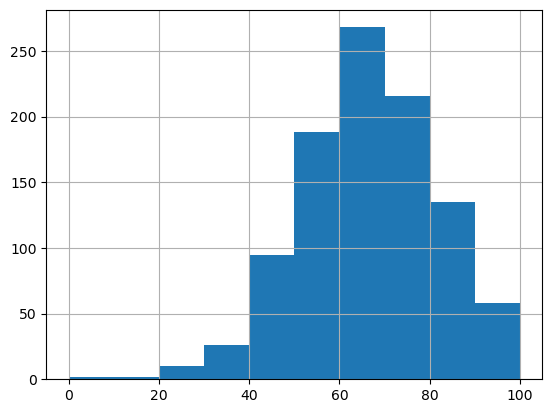

In [179]:
students_performance.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

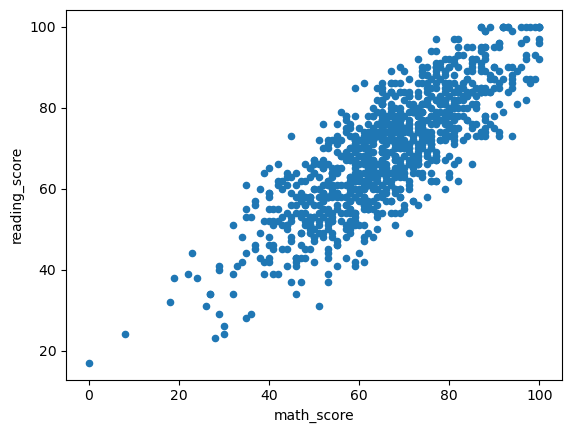

In [180]:
students_performance.plot.scatter( x='math_score', y = 'reading_score' )

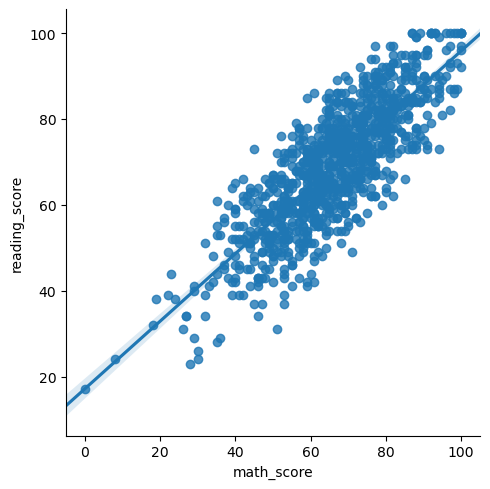

In [181]:
sns.lmplot(x='math_score', y = 'reading_score', data = students_performance)

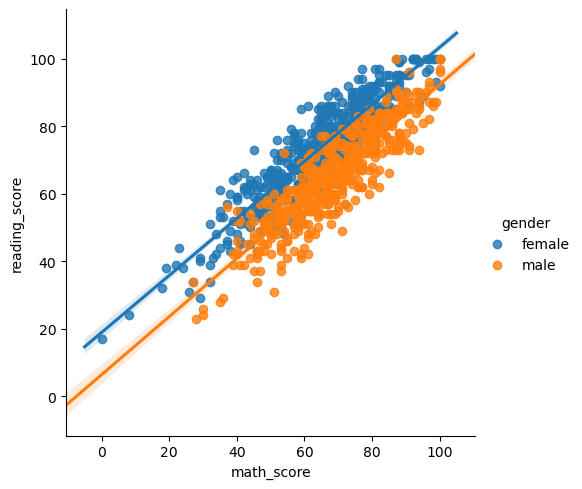

In [182]:
sns.lmplot(x='math_score', y = 'reading_score', hue = 'gender', data = students_performance)

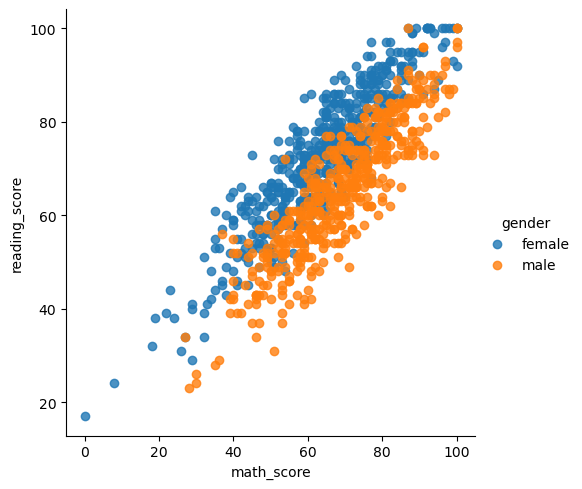

In [183]:
sns.lmplot(x='math_score', y = 'reading_score', hue = 'gender', \
           data = students_performance, fit_reg=False)

In [184]:
# Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего
# 1-ой колонкой income. Укажите верные способы, как отрисовать простой график зависимости
# зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)
# Убедитесь, что вы используте версию seaborn > = 0.9.

In [185]:
df5 = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
df5

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

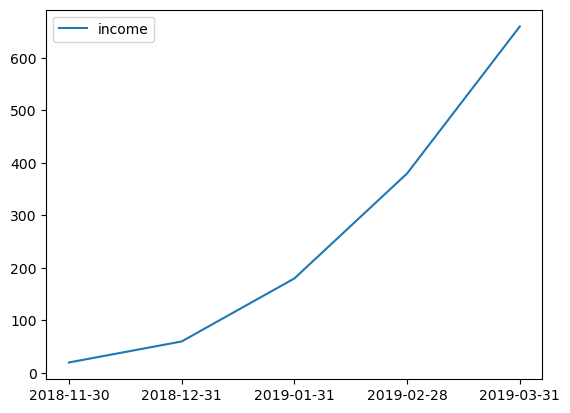

In [186]:
sns.lineplot(data=df5)

<AxesSubplot:>

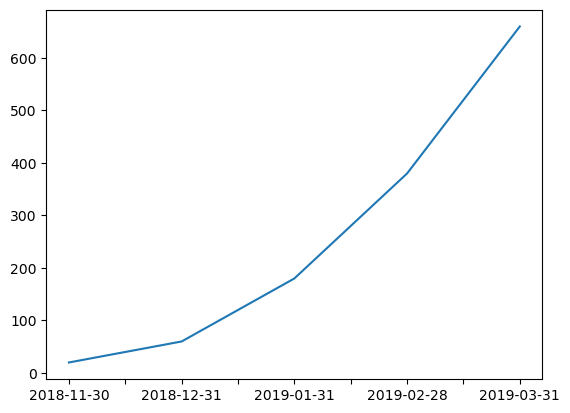

In [187]:
df5.income.plot()

<AxesSubplot:>

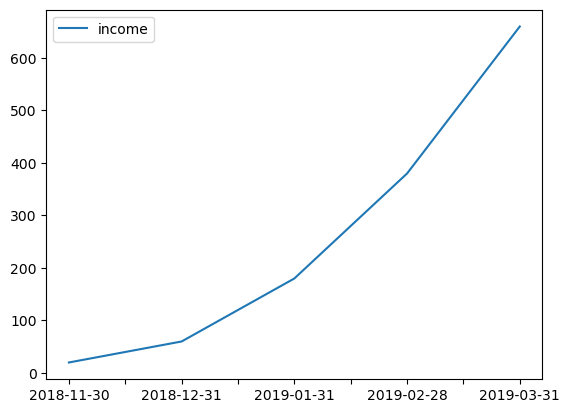

In [188]:
df5.plot(kind='line')

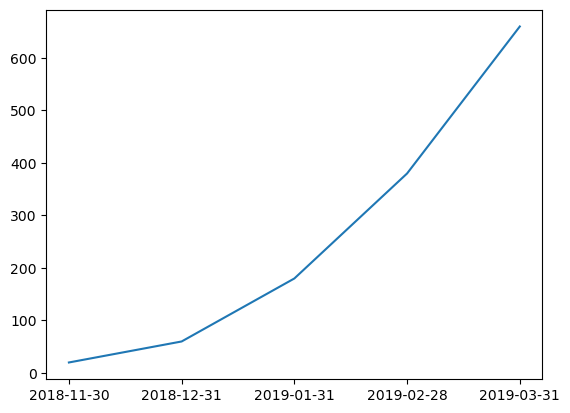

In [189]:
plt.plot(df5.index, df5.income)

<AxesSubplot:>

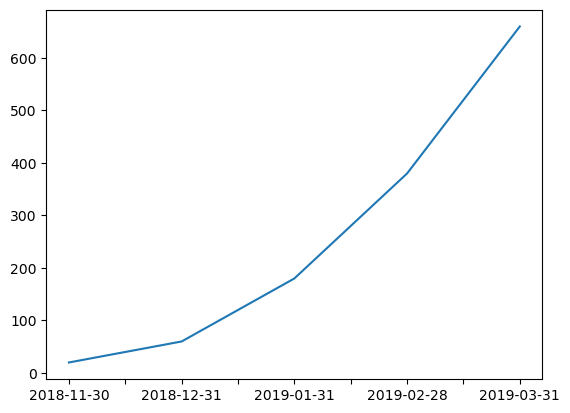

In [190]:
df5['income'].plot()

<AxesSubplot:ylabel='income'>

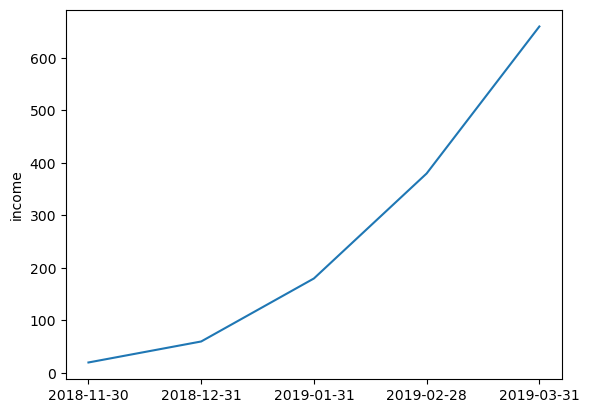

In [191]:
sns.lineplot(x=df5.index, y=df5.income)

<AxesSubplot:>

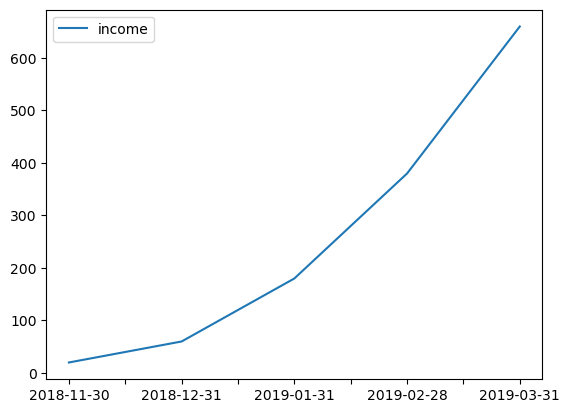

In [192]:
df5.plot()

In [193]:
# Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений)
# в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число
# кластеров, формируемых наблюдениями.
# В ответе вы должны указать число кластеров в виде числа (например: 3).

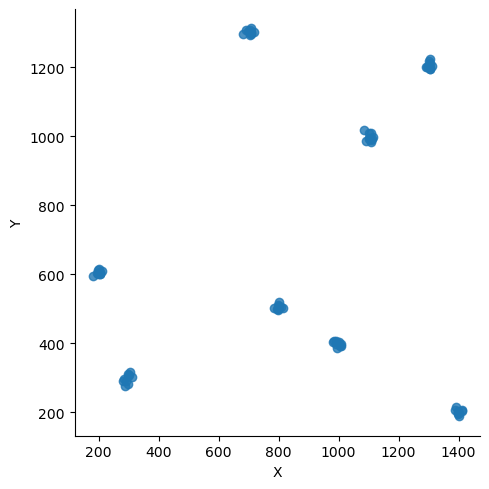

In [194]:
df6 = pd.read_csv('dataset_209770_6.txt', sep=" ")
ax = sns.lmplot(x='x', y = 'y', data = df6, fit_reg=False)
ax.set_xlabels('X')
ax.set_ylabels('Y')
ax

<AxesSubplot:xlabel='x', ylabel='y'>

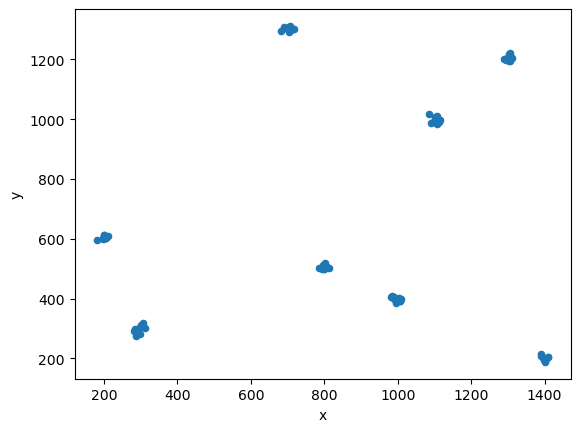

In [195]:
# Альтернативное решение предыдущей задачи
df7 = pd.read_csv("dataset_209770_6.txt", sep = ' ')
df7.plot.scatter(x = 'x', y = 'y')

In [196]:
# Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую
# карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует
# скачанным данным.
# Чтобы график отображался как на картинках, добавьте

In [197]:
df8 = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv',\
                  index_col=0)
df8

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


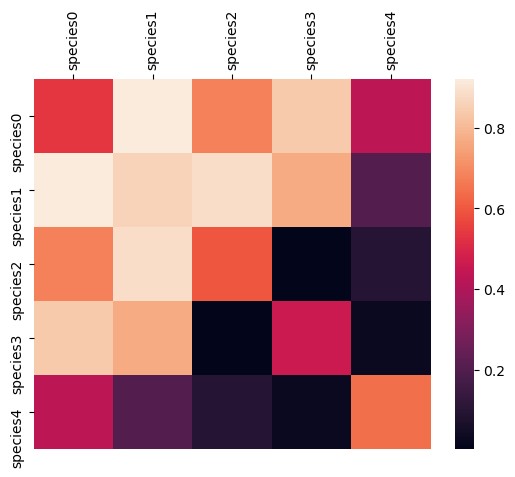

In [198]:
g = sns.heatmap(df8)
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [199]:
# Пришло время узнать, кто самый главный рак какая роль в dota самая распространённая.
# Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их
# возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким
# героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число
# ролей у большинства героев.
# Это задание можно выполнить многими путями, и рисовать гистограмму вообще говоря для
# этого не нужно.
# Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по dota 2

In [200]:
df9 = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')
df9

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


<AxesSubplot:>

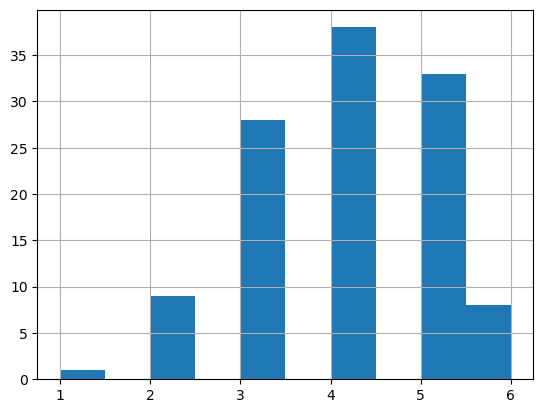

In [201]:
quantity = df9.roles.map(eval).map(len)
quantity.hist()

In [202]:
# Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы.
# Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров
# ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.
# Распределение должно быть по всем образцам, без разделения на вид.
# Чтобы построить на 1-ом графике распределения для каждого из параметров, можно
# воспользоваться петлёй

In [203]:
df10 = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')
df10

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


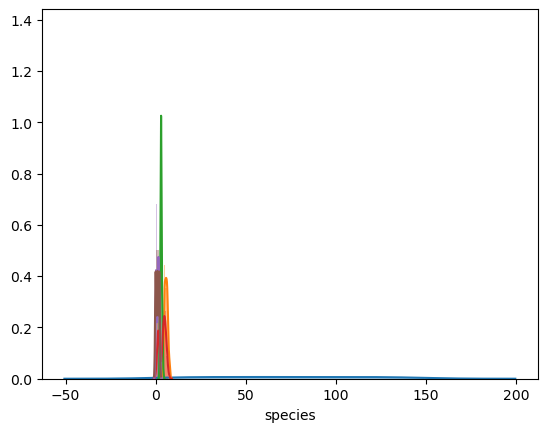

In [204]:
for column in df10:
   sns.distplot(df10[column])

In [205]:
# Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin
# плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью
# violin плота и выберите правильный (такой же) вариант среди предложенных

<AxesSubplot:xlabel='petal length'>

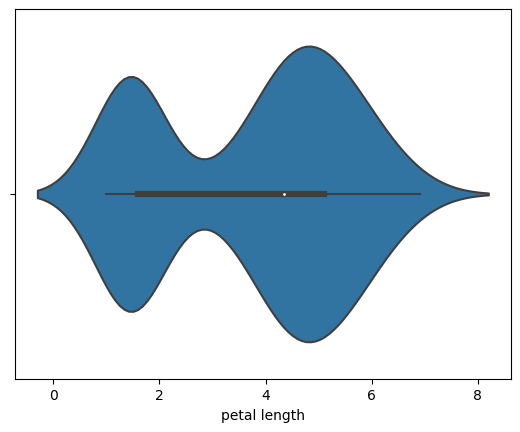

In [206]:
sns.violinplot(df10['petal length'])

In [207]:
# Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий
# зависимость пар переменных друг от друга, а также распределение каждой из переменных.
# Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар
# навскидку имеет наибольшую корреляцию?
# Также обратите внимание, что можно разделить на группы с помощью параметра hue.

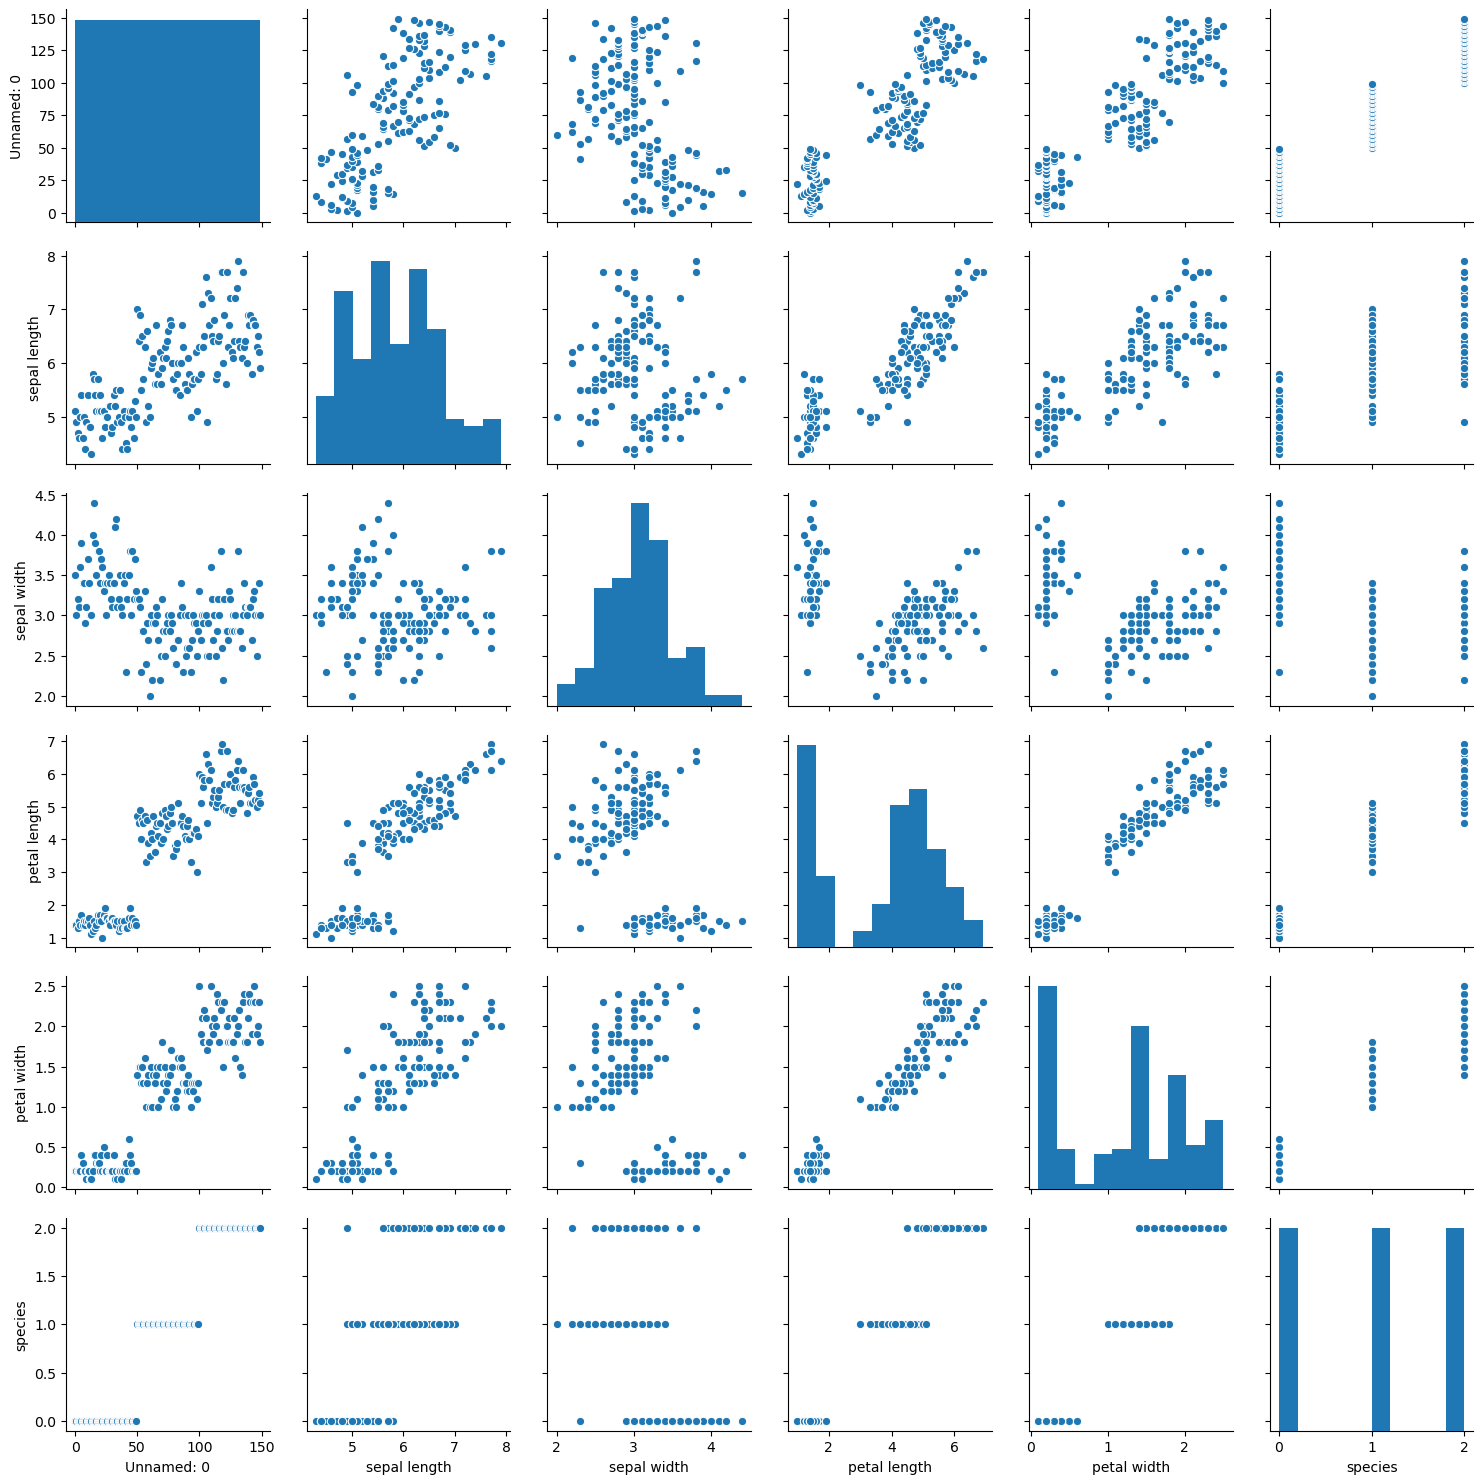

In [208]:
sns.pairplot(df10)

In [209]:
# 1.8 Практические задания: Pandas
# Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки
# c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:
# type value
# A    10
# A    14
# B    12
# B    23

In [210]:
d = {'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]}
my_data = pd.DataFrame(data=d)
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [211]:
my_data = pd.DataFrame([['A', 10],['A',14],['B',12],['B', 23]], columns=['type','value'])
my_data


,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [212]:
# Особенно важный навык при работе с данными - это умение быстро и эффективно отбирать
# нужные вам колонки или строки.
# Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки
# (V1, V2, V3, V4):
# В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
# В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.
# Помните, что нумерация индексов строк и колонок начинается с 0.
# Обратите внимание, получившиеся subset_1 и subset_2 - тоже должны быть dataframe.
# Вы можете скачать набор данных, которые нам также пригодятся в следующих заданиях,  и
# потренироваться у себя на компьютере. Чтобы считать данные при помощи pandas, используйте
# функцию read_csv.
# import pandas as pd
# my_stat = pd.read_csv('my_stat.csv')
# Важно понимать, в чем разница между pandas loc и iloc. Как отобрать все строки кроме
# указанных? Умение искать ответы поможет вам на начальных этапах знакомства с pandas!

In [213]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [214]:
subset_1 = my_stat.iloc[0:10, [0,2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [215]:
df12 = my_stat.drop([0,4], axis =0)
df12

,V1,V2,V3,V4
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
6,0,9.0,A,2.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [216]:
subset_2 = df12.drop(['V1', 'V3'], axis=1)
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [217]:
# Альтернативное решение

In [218]:
subset_1=my_stat.iloc[:10, [0, 2]]
subset_2=my_stat.iloc[:, [1, 3]].drop([0, 4])

In [219]:
# Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию.
# В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:
# В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1
# строго больше 0, и значение переменной V3  равняется 'A'.
# В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не
# равняются 10, или значения переменной V4 больше или равно 1.
# Как и в предыдущей задаче результат фильтрации - это тоже dataframe.
# Фильтрацию данных можно осуществить разными способами, например так или так.

In [220]:
subset_3 = my_stat.query('V1 >0 & V3 =="A"')
subset_3

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0
...,...,...,...,...
491,4,7.0,A,2.0
494,1,11.0,A,1.0
495,1,8.0,A,-1.0
496,3,8.0,A,1.0


In [221]:
subset_4 = my_stat.query('V2 !=10 | V4 >= 1')
subset_4

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [222]:
# Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее
#дейтвие. В этих данных (my_stat) создайте две новые переменных:
# V5 = V1 + V4
# V6 = натуральный логарифм переменной V2
# Где найти натуральный логарифм?

In [223]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


In [224]:
# Альтернативное решение

In [225]:
my_stat=my_stat.assign(V5 = my_stat.V1+my_stat.V4, V6 = np.log(my_stat.V2));

In [226]:
# Отличная работа, закрепим еще пару важных вопросов и можно двигаться дальше.
# Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в
# результате ошибиться в расчетах.
# Переименуйте колонки в данных  my_stat следующим образом:
# V1 -> session_value
# V2 -> group
# V3 -> time
# V4 -> n_users

In [227]:
my_stat.rename(columns= {'V1' : 'session_value', 'V2' : 'group', 'V3' : 'time', 'V4' : 'n_users'}, inplace= True)
my_stat

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


In [228]:
# И напоследок давайте разберемся, как заменять наблюдения в данных.
# В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.
# В переменной session_value замените все пропущенные значения на нули.
# В переменной n_users замените все отрицательные значения на медианное значение переменной n_users
# (без учета отрицательных значений, разумеется).
# Как получить медиану переменной n_users без учета отрицательных значений? Если не придумали решения,
# подсказка - ищите один из возможных ответов в задачах, которые мы уже решили.
# Данные для тренировки.

In [229]:
my_stat1 = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')

In [230]:
my_stat1 = my_stat1.fillna(0)

In [231]:
my_stat1.loc[my_stat1['n_users'] < 0, 'n_users'] = my_stat1.query('n_users>=0').n_users.median()

In [232]:
my_stat1

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [233]:
# Чуть не забыли, никакой анализ данных не обходится без агрегации наблюдений. Напомню, в pandas с этим нам поможет связка
#groupby + некоторое преобразование. Например:
# число наблюдений в каждой группе
# df.groupby('group_var').count()
# Для того, что бы сгруппировать данные по нескольким переменным, используем список с нужными именами:
# df.groupby(['group_var_1', 'group_var_2']).count()
#cОбратите внимание, что при такой записи группирующие переменные станут индексами в итоговом dataframe, изучите справку
# по groupby, чтобы разобраться со всеми тонкостями группировки данных. Также функция count() применится ко всем колонкам,
#что не всегда является желанным результатом. Чтобы применить функцию только к нужной колонке в данных, можно использовать
# связку  groupby() + agg()
# my_stat.groupby('group').agg({'n_users': 'count'})
# В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group),
# в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением
# session_value в mean_session_value.
# Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [234]:
mean_session_value_data = my_stat.groupby('group', as_index= False).agg({'session_value' : 'mean'}).rename(columns= {'session_value' : 'mean_session_value'})

In [235]:

mean_session_value_data

,group,mean_session_value
0,5.0,0.000000
1,7.0,0.333333
2,8.0,0.633333
3,9.0,0.238938
4,10.0,0.065990
5,11.0,-0.081081
6,12.0,-0.078947
7,13.0,0.000000


In [236]:
# Альтернативное решение

In [237]:
mean_session_value_data = my_stat.groupby("group",as_index=False).session_value.agg({'mean_session_value':'mean'})

In [238]:
mean_session_value_data

,group,mean_session_value
0,5.0,0.000000
1,7.0,0.333333
2,8.0,0.633333
3,9.0,0.238938
4,10.0,0.065990
5,11.0,-0.081081
6,12.0,-0.078947
7,13.0,0.000000


In [239]:
# 1.10. Stepik ML contest - это еще что такое
# Практическим проектом нашего курса будет анализ активности студентов онлайн курса Введение в анализ данных в R,
# спасибо команде stepik, что предоставили анонимизированные данные.
# В этом модуле, мы разберемся с задачей, начнем исследовать данные, а об условиях соревнований, призах и тайных стэпах
# раскажу во втором модуле!

#Описание данных:

#events_train.csv - данные о действиях, которые совершают студенты со стэпами
#
# step_id - id стэпа
# user_id - анонимизированный id юзера
# timestamp - время наступления события в формате unix date
# action - событие, возможные значения:
# discovered - пользователь перешел на стэп
# viewed - просмотр шага,
# started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
# passed - удачное решение практического шага
# submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям
# step_id - id стэпа
# timestamp - время отправки решения в формате unix date
# submission_status - статус решения
# user_id - анонимизированный id юзера

In [240]:
event_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [241]:
event_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [242]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [243]:
event_data['date'] = pd.to_datetime(event_data.timestamp, unit='s')

In [244]:
event_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [245]:
event_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [246]:
event_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [247]:
event_data['day'] = event_data.date.dt.date

In [248]:
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


<AxesSubplot:xlabel='day'>

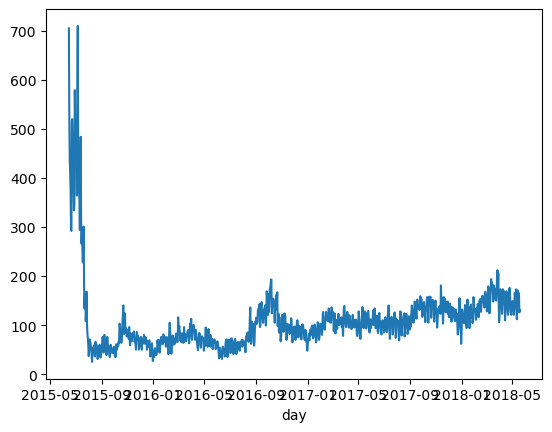

In [249]:
event_data.groupby('day').user_id.nunique().plot()

In [250]:
sns.set(rc = {'figure.figsize' : (9,6)})

<AxesSubplot:xlabel='day'>

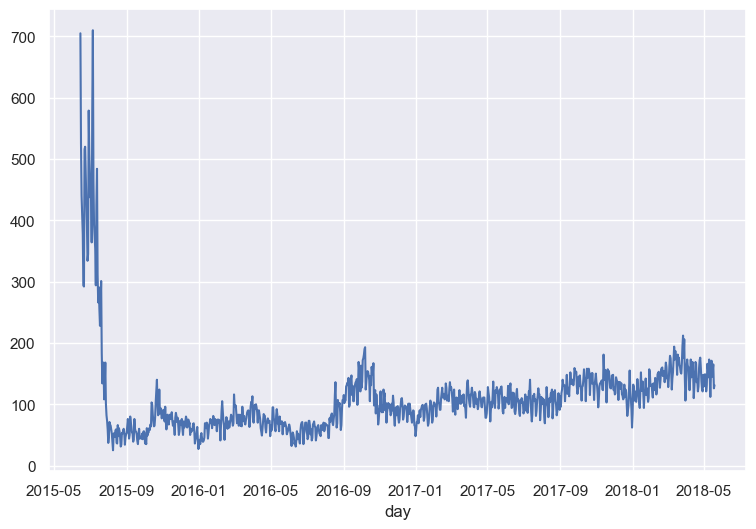

In [251]:
event_data.groupby('day').user_id.nunique().plot()

In [252]:
event_data[event_data.action == 'passed'].groupby('user_id', as_index=False) \
.aggregate({'step_id' : 'count'}).rename(columns={'step_id' : 'passed_steps'})

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
17257,26789,2
17258,26790,8
17259,26794,69
17260,26797,10


<AxesSubplot:>

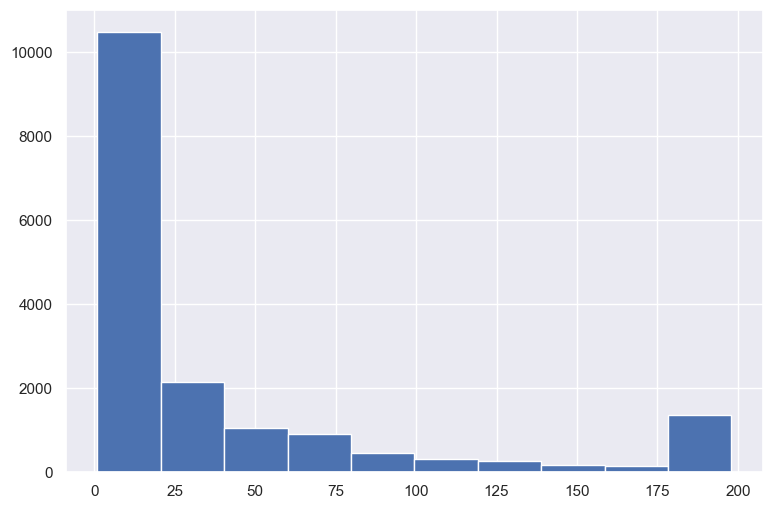

In [253]:
event_data[event_data.action == 'passed'].groupby('user_id', as_index=False) \
.aggregate({'step_id' : 'count'}).rename(columns={'step_id' : 'passed_steps'}).passed_steps.hist()

In [254]:
event_data.pivot_table(index = 'user_id', columns='action', values = 'step_id', aggfunc = 'count', fill_value = 0)

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [255]:
event_data.pivot_table(index = 'user_id', columns='action', values = 'step_id', \
                       aggfunc = 'count', fill_value = 0).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


<AxesSubplot:>

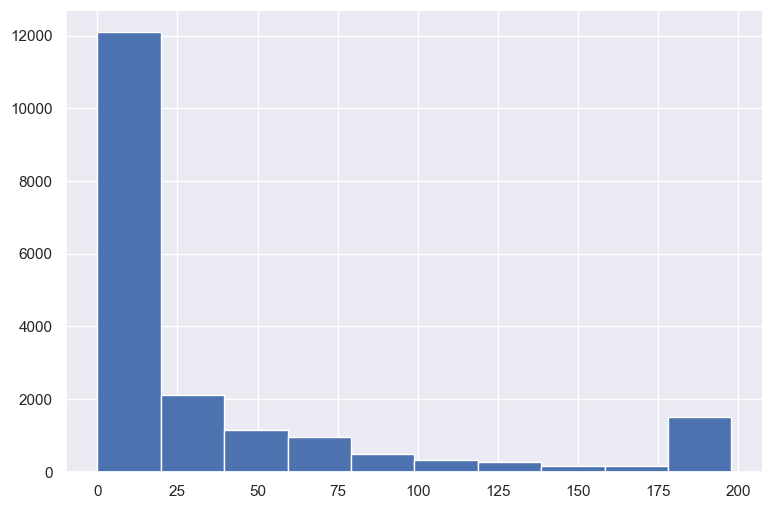

In [256]:
event_data.pivot_table(index = 'user_id', columns='action', values = 'step_id', \
                       aggfunc = 'count', fill_value = 0).reset_index().discovered.hist()

In [257]:
user_event_data = event_data.pivot_table(index = 'user_id', columns='action', values = 'step_id', \
                       aggfunc = 'count', fill_value = 0).reset_index()

In [258]:
user_event_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [259]:
submissions_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [260]:
submissions_train

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [261]:
submissions_train['date'] = pd.to_datetime(submissions_train.timestamp, unit = 's')

In [262]:
submissions_train['day'] = submissions_train.date.dt.date

In [263]:
submissions_train

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [264]:
users_scores = submissions_train.pivot_table(index = 'user_id', columns='submission_status', values = 'step_id', \
                       aggfunc = 'count', fill_value = 0).reset_index()

In [265]:
# Определяем среднее время перерывов у юзеров на курсе
gap_data = event_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
.groupby('user_id')['timestamp'].apply(list) \
.apply(np.diff).values

In [266]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [267]:
gap_data = gap_data / (24 * 60 * 60)

<AxesSubplot:>

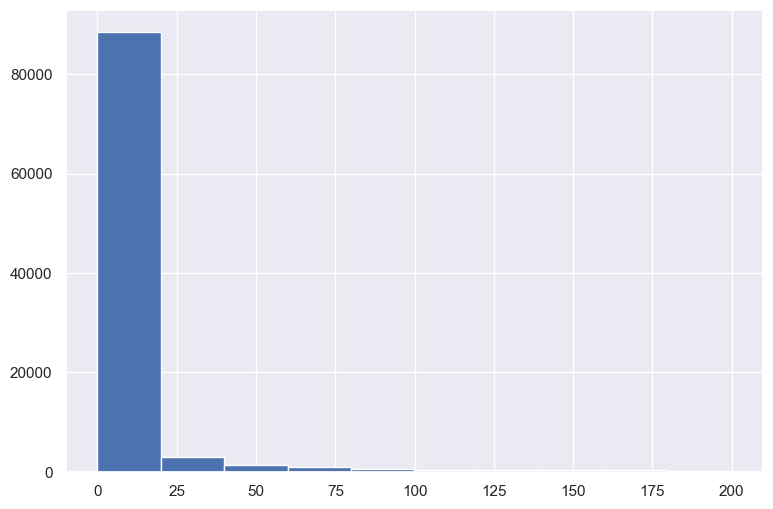

In [268]:
gap_data[gap_data < 200].hist()

In [269]:
gap_data.quantile(0.95)

59.760440972222156

In [270]:
user_data = event_data.groupby('user_id', as_index=False).agg({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [271]:
event_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [272]:
now = 1526772811
drop_out= (24 * 60 * 60) * 30

In [273]:
user_data['is_gon_users'] = (now - user_data.last_timestamp) > drop_out

In [274]:
user_data = user_data.merge(users_scores, how = 'outer')

In [275]:
user_data = user_data.fillna(0)

In [276]:
user_data

,user_id,last_timestamp,is_gon_users,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [277]:
user_data = user_data.merge(user_event_data, how = 'outer')

In [278]:
user_data

,user_id,last_timestamp,is_gon_users,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [279]:
user_day = event_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [280]:
user_day

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [281]:
user_data = user_data.merge(user_day,  how = 'outer')

In [282]:
user_data

,user_id,last_timestamp,is_gon_users,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [283]:
user_data.user_id.nunique()

19234

In [284]:
event_data.user_id.nunique()

19234

In [285]:
user_data['passed_corse'] = user_data.passed > 170

In [286]:
user_data

,user_id,last_timestamp,is_gon_users,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [287]:
user_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gon_users,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [288]:
100 * 1425/17809

8.001572238755685

In [289]:
# Как я уже писал ранее, данные, с которыми мы работаем, обезличены, тоесть реальные id пользователей заменены случайным
# числом. Анонимизация пользовательских данных - очень важная тема для Data Science. С одной стороны мы хотим знать о
# поведении наших пользователей как можно больше, с другой стороны нам важно соблюдать приватность наших пользователей.
# Поэтому данные о поведении пользователей анонимизируют не только когда речь идет об открытых данных, но и при работе с
# данными внутри компании. Не заметили сколько писем вам недавно пришло об изменении политики конфеденциальности, хотите
# узнать почему? В комментарии приложена ссылка на очень интересный доклад об этой проблеме.
# А пока что вот вам хакерская задача, за каким вымышленным id скрывается Анатолий Карпов - автор курса, данные которого
# мы анализируем?
# Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.


In [290]:
users_scores[ users_scores.correct == users_scores['correct'].max()]

submission_status,user_id,correct,wrong
439,1046,421,513


In [291]:
id = event_data.groupby('user_id')['day'].nunique().idxmax()


In [292]:
id



1046